# CAR_PRICE_PREDICTION_WITH_MACHINE_LEARNING

**This notebook is an attempt to predict the selling price of a car(used car) which depends on various factors**

<img src = "Images/Car.jpg" />

***For this project we will follow our 6 steps machine learning framework.***

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

# 1. Problem Definition

**The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learnin**g.

# 2. Data

**The data set is taken from the Kaggle.**
https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars/data

# 3. Evaluation

**The goal of our project is to achieve the higher accuracy say above 95%.**

# 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

# 5. Modelling

This is the regression problem because we're predicting a quantity which is the sell price of the car here. 
So we'll use the regression models.

## Get our tools ready!!

In [44]:
## For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## For modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## For evaluation 
from sklearn.metrics import mean_squared_error

### Loading the data

In [3]:
df = pd.read_csv("data sets/car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
## Get some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Get some statiscal info about the data
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
# Check for missing values if present
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
# Let's check the unique number of cars
df["Car_Name"].value_counts().unique

<bound method Series.unique of Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64>

#### Fuel type

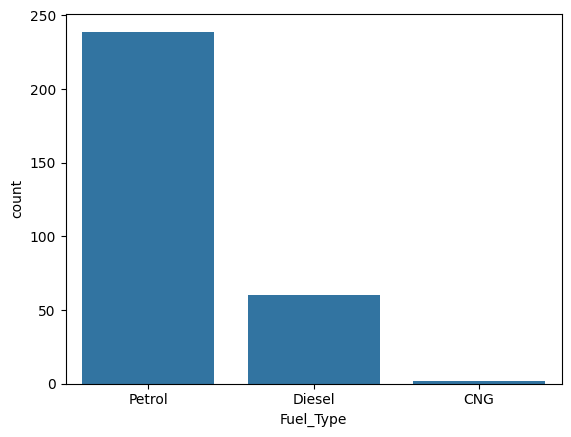

In [28]:
sns.countplot(x='Fuel_Type', data=df)
plt.show()

#### Selling Price distribution

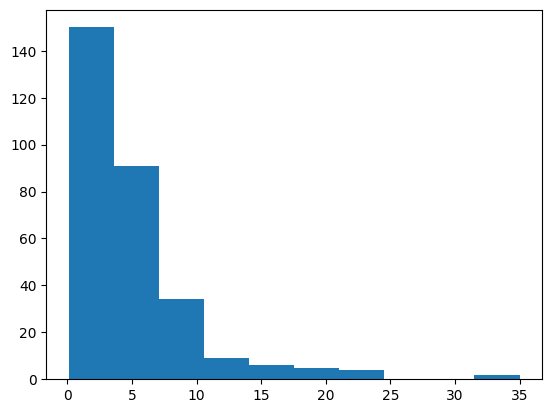

In [29]:
plt.hist(df["Selling_Price"]);

#### Selling Type

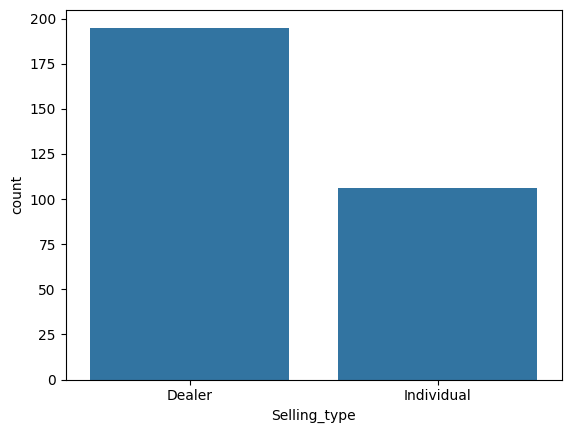

In [30]:
sns.countplot(x='Selling_type', data=df)
plt.show()

#### Transmission Type

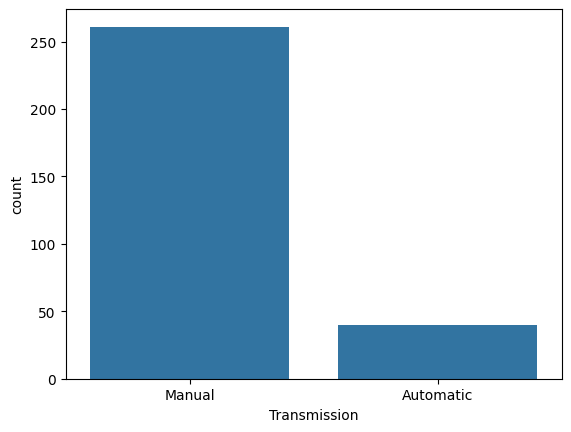

In [31]:
sns.countplot(x='Transmission', data=df)
plt.show()

#### Numeric Features

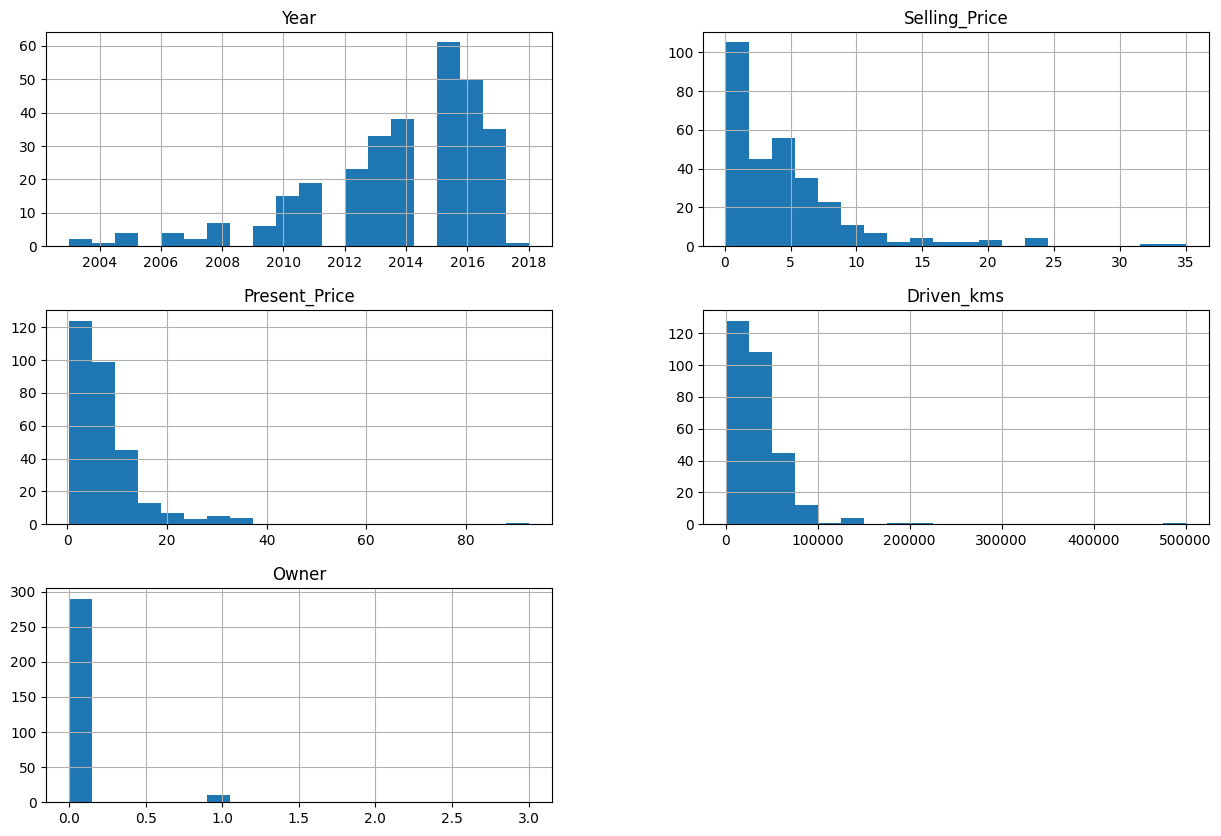

In [33]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

#### Relationships between different numerical features and our target features

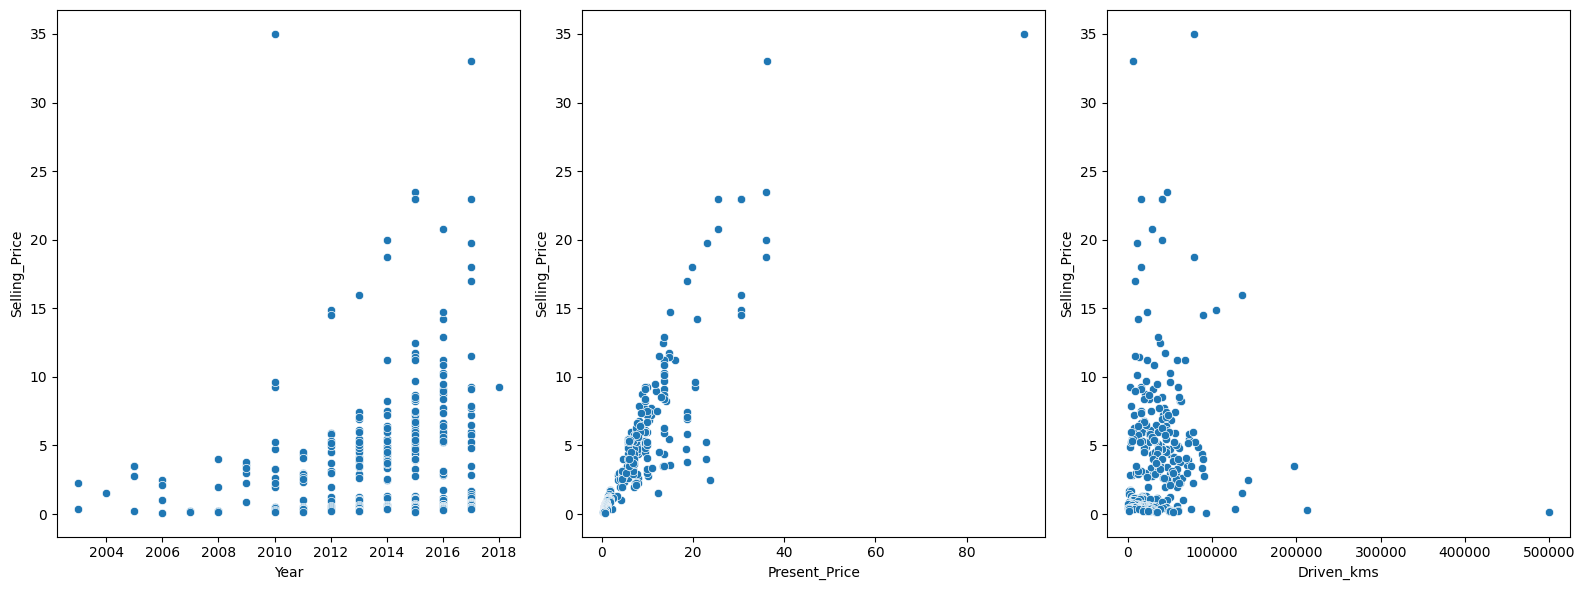

In [34]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Year', y='Selling_Price', data=df)
plt.subplot(1, 3, 2)
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.subplot(1, 3, 3)
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.tight_layout()
plt.show()

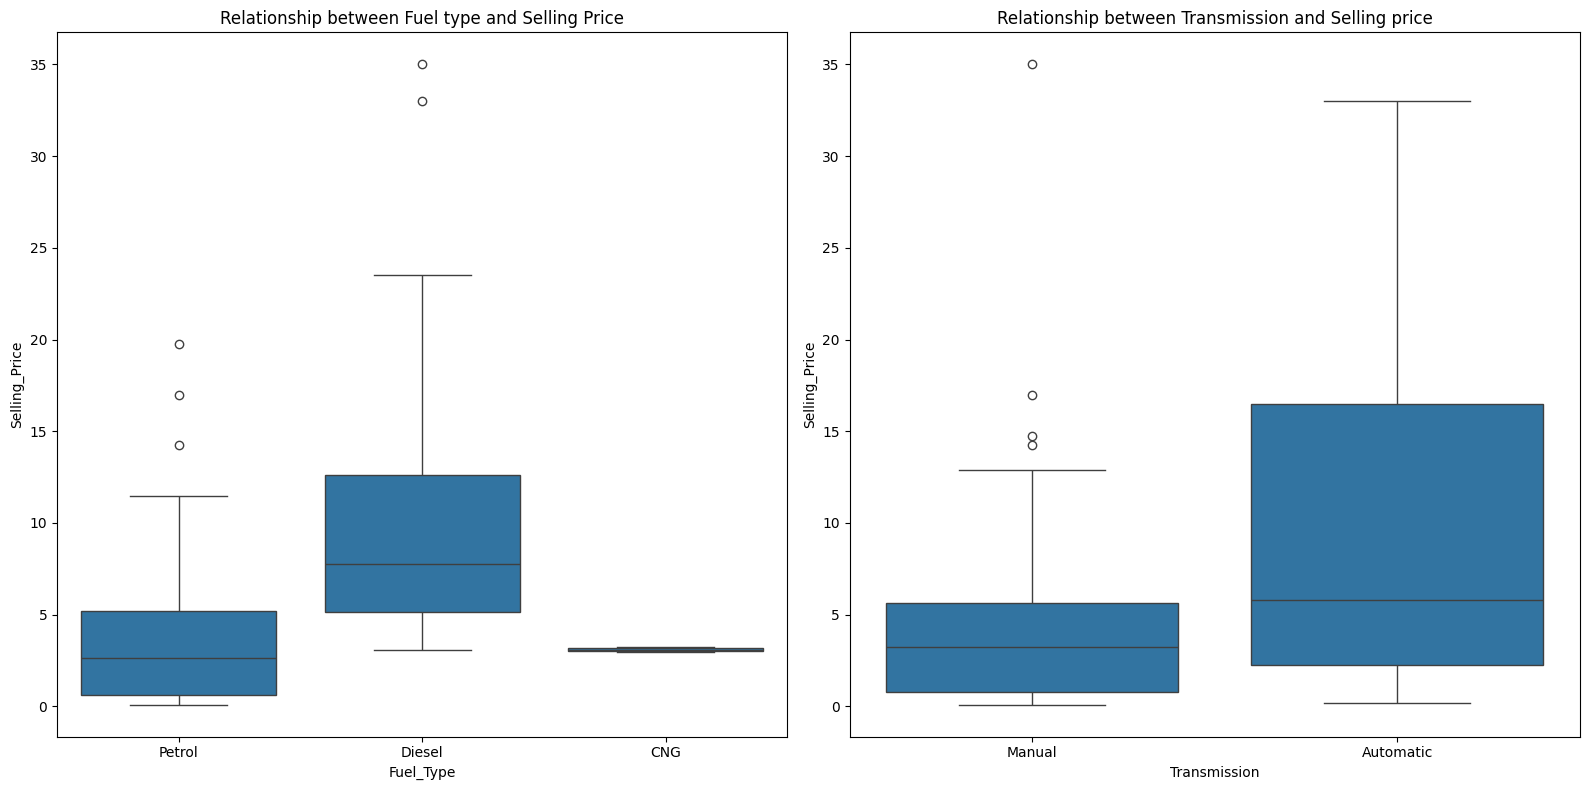

In [35]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Relationship between Fuel type and Selling Price')
plt.subplot(1, 2, 2)
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Relationship between Transmission and Selling price')
plt.tight_layout()
plt.show()

#### Relationship between Car model and selling price

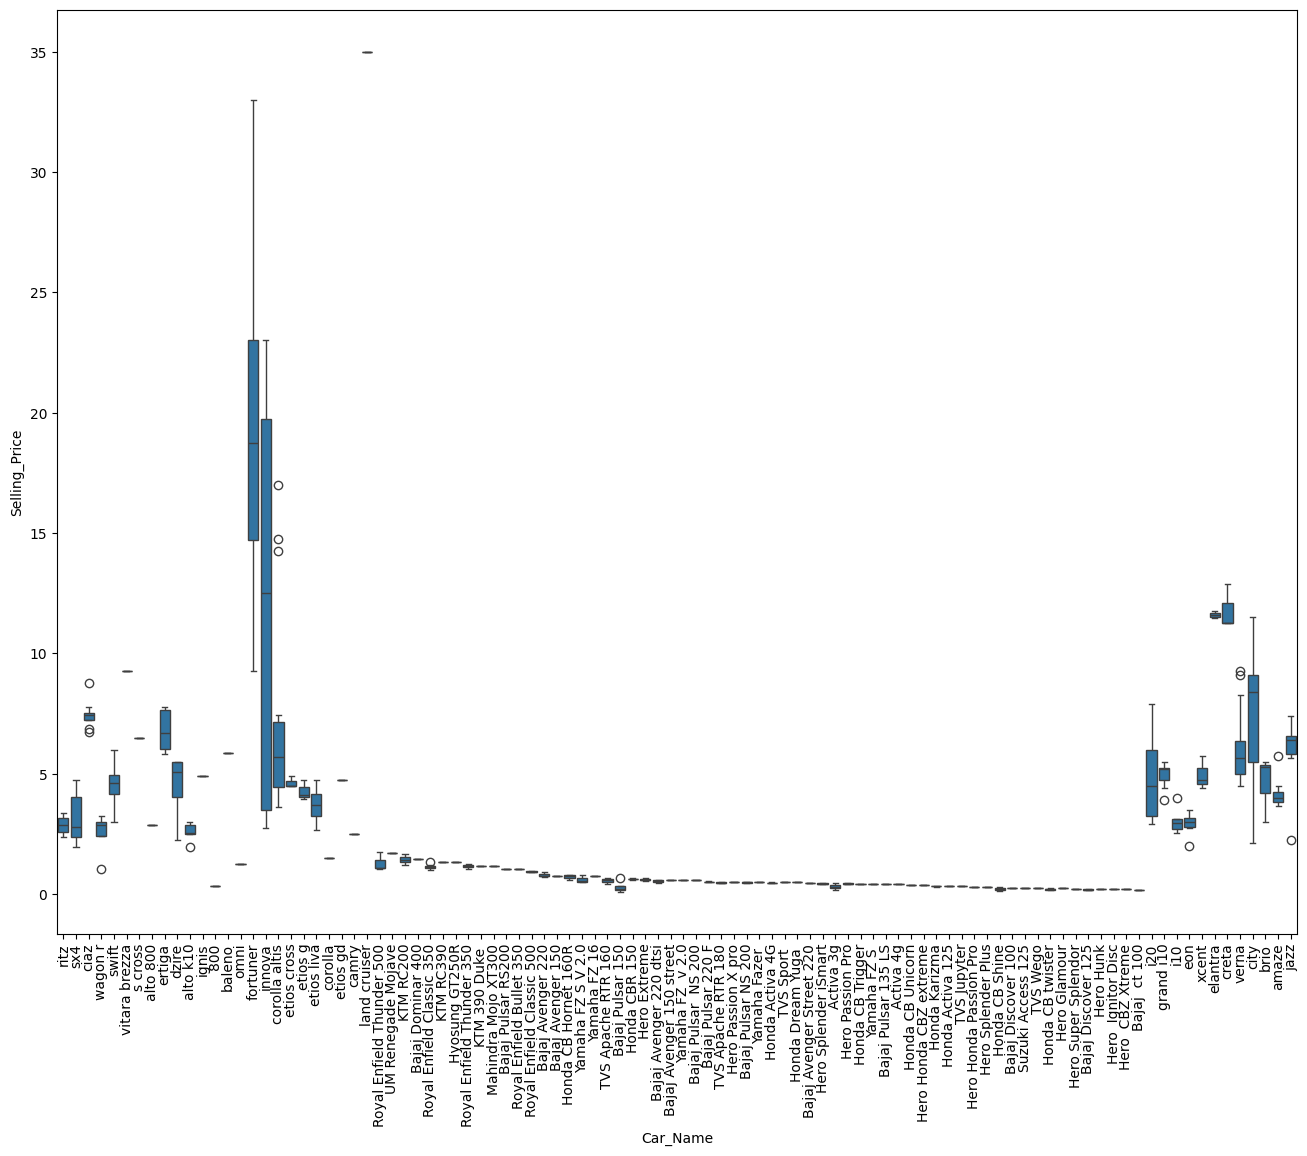

In [36]:
plt.figure(figsize=(16,12))
sns.boxplot(x='Car_Name', y='Selling_Price', data=df)
plt.xticks(rotation=90)  
plt.show()

In [37]:
#Split the datset into features
np.random.seed(42)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [38]:
# One-hot encoding categorical values into numerical values
X_encoded = pd.get_dummies(X, columns=['Fuel_Type', 'Selling_type', 'Transmission','Car_Name'], prefix=['Fuel', 'Selling', 'Transmission','Cars'])

In [39]:
#Splitting the dataset
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2)

In [40]:
# Training the model 
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [41]:
# Evaluate 
model.score(X_test , y_test)

0.9611761158495304

In [42]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([ 0.4139, 10.3245,  5.07  ,  0.2128,  7.3975,  6.769 ,  1.0935,
        0.5794,  0.4675,  6.7025,  7.9431,  1.0855,  8.6289,  0.4586,
        5.41  ,  2.605 ,  1.1217, 13.4953,  0.4689,  1.5745,  0.3549,
        7.7673,  4.938 ,  2.7565,  0.514 ,  3.5095,  5.392 ,  3.117 ,
        1.1635,  1.1715,  0.4073,  9.0894,  0.4723,  2.598 ,  7.8098,
        4.1235,  6.2267,  5.83  ,  2.5105,  6.0953,  4.9838,  3.7642,
        4.845 ,  0.5516,  6.3325,  0.703 ,  8.1354,  6.9019,  2.8995,
        3.479 ,  4.9745,  1.5575, 22.3615, 20.5038,  6.541 , 10.1315,
        5.109 ,  8.7541,  2.8349,  6.422 ,  0.2237])

In [48]:
#Evaluating the Random Forest Model
mse_rf = mean_squared_error(y_test, y_pred)
print(f'Random Forest MSE: {mse_rf}')

Random Forest MSE: 0.8943308647540986


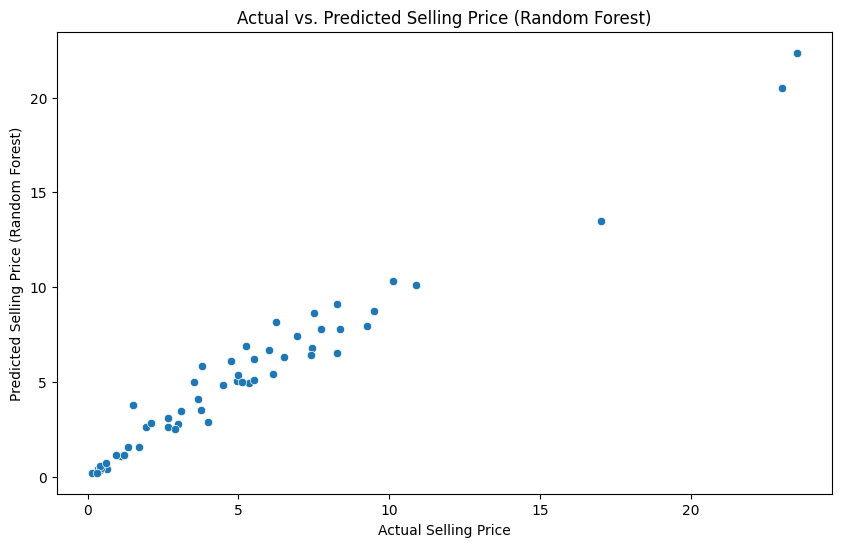

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price (Random Forest)')
plt.title('Actual vs. Predicted Selling Price (Random Forest)')
plt.show()